In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense,Conv1D,Flatten,MaxPool1D,Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
#The dataset contains no header for columns, hence the header parameter
train=pd.read_csv('./mitbih_train.csv',header=None)
test=pd.read_csv('./mitbih_test.csv',header=None)

In [3]:
data = pd.concat([train, test]).sample(frac=1).reset_index(drop=True)

In [4]:
Y=data[data.columns[-1:]]
X=data[data.columns[:-1]]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
print(x_train.shape)

(82084, 187)


In [6]:
y_train=y_train.to_numpy()
x_train=x_train.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_train=x_train.reshape([-1,187,1])

In [7]:
y_test=y_test.to_numpy()
x_test=x_test.to_numpy()
#Add data dimension, doesn't actually change the data but that's how the input is expected, like it could have multiple values per timestamp
x_test=x_test.reshape([-1,187,1])

In [8]:
model = tf.keras.models.Sequential()

#First CNN layer  with 32 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=32, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001), input_shape = (x_train.shape[1],1)))

#Second CNN layer  with 64 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=64, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Third CNN layer with 64 filters, conv window 5, relu activation and same padding
model.add(Conv1D(filters=128, kernel_size=(5,), padding='same', activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Fourth CNN layer with Max pooling
model.add(MaxPool1D(pool_size=(5,), strides=2, padding='same'))
model.add(Dropout(0.5))

#Flatten the output
model.add(Flatten())

#Add a dense layer with 512 neurons
model.add(Dense(units = 512, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Add a dense layer with 1024 neurons
model.add(Dense(units = 1024, activation=tf.keras.layers.LeakyReLU(alpha=0.001)))

#Softmax as last layer with two outputs
model.add(Dense(units = 5, activation='softmax'))

In [9]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs = 10)

Epoch 1/10
2566/2566 [==============================] - 156s 60ms/step - loss: 0.1529 - accuracy: 0.9580
Epoch 2/10
2566/2566 [==============================] - 162s 63ms/step - loss: 0.0867 - accuracy: 0.9763
Epoch 3/10
2566/2566 [==============================] - 163s 63ms/step - loss: 0.0665 - accuracy: 0.9810
Epoch 4/10
2566/2566 [==============================] - 165s 64ms/step - loss: 0.0562 - accuracy: 0.9833
Epoch 5/10
2566/2566 [==============================] - 164s 64ms/step - loss: 0.0493 - accuracy: 0.9856
Epoch 6/10
2566/2566 [==============================] - 172s 67ms/step - loss: 0.0441 - accuracy: 0.9868
Epoch 7/10
2566/2566 [==============================] - 179s 70ms/step - loss: 0.0390 - accuracy: 0.9881
Epoch 8/10
2566/2566 [==============================] - 182s 71ms/step - loss: 0.0361 - accuracy: 0.9889
Epoch 9/10
2566/2566 [==============================] - 175s 68ms/step - loss: 0.0318 - accuracy: 0.9903
Epoch 10/10
2566/2566 [==============================] 

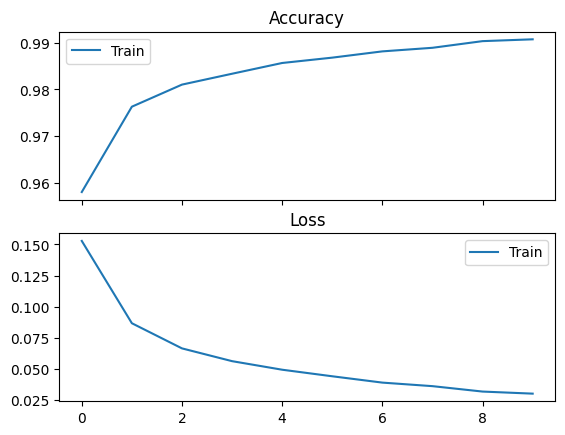

In [10]:
fig, ax = plt.subplots(2,sharex=True)
ax[0].set_title("Accuracy")
ax[0].plot(history.epoch, history.history['accuracy'],label='Train');
# ax[0].plot(history.epoch, history.history['val_accuracy'],label='Validation');
ax[0].legend()
ax[1].set_title("Loss")
ax[1].plot(history.epoch, history.history['loss'],label='Train');
# ax[1].plot(history.epoch, history.history['val_loss'],label='Validation');
ax[1].legend()

In [11]:
model.evaluate(x_test, y_test, verbose=True)

856/856 [==============================] - 9s 10ms/step - loss: 0.0694 - accuracy: 0.9867


[0.06937465816736221, 0.9866968989372253]

In [12]:
from sklearn.metrics import classification_report
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

856/856 [==============================] - 9s 11ms/step
              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99     22705
         1.0       0.92      0.83      0.88       675
         2.0       0.97      0.96      0.96      1786
         3.0       0.94      0.66      0.77       221
         4.0       0.99      0.99      0.99      1975

    accuracy                           0.99     27362
   macro avg       0.96      0.89      0.92     27362
weighted avg       0.99      0.99      0.99     27362

